In [ ]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1==0.7.4
!pip install rhinoMorph

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ 

In [ ]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.layers import Embedding, Dense, LSTM 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import rhinoMorph

from matplotlib import font_manager, rc
font_location = 'C:\Windows\Fonts\malgunsl.ttf'
plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
rn = rhinoMorph.startRhino()

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


### 빈도분석

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
os.listdir('gdrive/My Drive/pytest')

['Sentiment Analysis Dataset.csv',
 'iris.csv',
 'test.csv',
 'ratings_morphed.txt',
 '김소월시.txt',
 '윤동주시.txt',
 'ratings.txt',
 'wiki_test.txt',
 'negative.txt',
 'positive.txt',
 'ratings_small.txt',
 'kor-eng',
 '네이버뉴스-생활문화_다중',
 'word2vec',
 'aclImdb_v1_small',
 'similarity',
 'fra-eng',
 'rathings_morphed.txt',
 'rathings.txt',
 'stopwords-ko.txt',
 '크롤링 20000개.csv',
 '학대별 라벨.xlsx',
 'bert',
 '위험별 척도 유형 200개씩.xlsx',
 'Child_Abuser.csv',
 '위험 척도 유형별 (1000개) .csv',
 '위험 척도 유형 (해당없음 제거) .csv',
 '학대별 라벨-중복제거.xlsx']

In [ ]:
df = pd.read_excel('gdrive/My Drive/pytest/학대별 라벨-중복제거.xlsx')

In [ ]:
df1 = df.drop(['번호'], axis = 1)
df1

,내용,Label
0,\n\t\t\t\t\t\t저는 고등학생 여자입니다7살때부터 가정폭력을 당해왔는데요엄...,1
1,\n\t\t\t\t\t\t20대 성인 여성입니다. 졸업을 목전에 두고 있는데 아빠의...,1
2,\n\t\t\t\t\t\t옛날부터 엄마가 아빠라는 사람한테 가정폭력을 당했습니다 여...,1
3,\n1년이라는 짧지 않은 시간 동안 결혼생활이 지옥같았고 그걸 마무리하려고 합니다남...,1
4,\n\t\t\t\t\t\t엄마가 돌돌이? 찍찍이로 방 청소 언제 할거냐 여쭤보셔서 ...,1
...,...,...
10064,\n\t\t\t\t\t\t안녕하세요 4학년 여자입니다 저희 엄마때문에 질문을 하는데...,3
10065,\n보통 엄마들은 막 과외도 부쳐주고 막 그러자나요 그런데 저희 엄마는요 성...,3
10066,"\n 현재 일반계 고등학교 1학년 학생이고요,엄마는 직장에 다니십니다. 엄마와 학교...",3
10067,\n털어넣고 말할게요 우리 엄마가 화투?를 해요 근데 저번에 경찰에 들켰는데 발뺌하...,3


In [ ]:
# df2 = df1.loc[df1['Label'] == 1]

In [ ]:
list1 = df1.values.tolist()
list1

[['\n\t\t\t\t\t\t저는 고등학생 여자입니다7살때부터 가정폭력을 당해왔는데요엄마아빠 둘다 당해봤지만엄마는 제가 크면서 언어적폭력만하시지만문제는 아빠입니다솔직히 아빠라고 입에올리기도 싫을 정도로 세상 남자중에서 아빠가 제일 싫을 정도인데요그렇다고 신고하기에도 금전적 손해가 크고 제대로 해결도 안되고 끝날수도 있다는 걱정에 여태껏 신고도 못하고 억울하게 살아왔습니다어떤 가정폭력이냐면 신체적 폭력은 물론 언어폭력은 도가 지나치고 심지어 종종 일상에서 성희롱적 발언도 합니다.가정폭력당하는 이유도 단지 하나뿐입니다.지 기분을 잡치게 했다는 이유로 저런 말도 안되는 폭력을 저질릅니다. 정말 솔직희 저의 잘못도 있지만 혼낼때 지기분 상하게 했던 외부일까지 끌어들여 화풀이를 하며 때립니다. 말로 타일러거나 때리는것도 적당한 선에서 해야지 피멍이 들 정도 때리는게 기본입니다.주제에서 약간 벗어났지만 저새끼 요즘 바람도 피는것 같아서 눈감아주고 있는데 진짜 걍 부모가 이혼했으면 좋겠을 정도 아빠가 싫습니다.(바람피고 있다고 생각이드는 이유는핸드폰 문자질할때 굳이 몸을 비틀면서 숨기면서 하고 통화는 나가서 받는 경우가 잦아지고 주말마다 출장핑계대면서 1박2일 외박하고 오는 등등어떤 상사가 그렇게 주말마다 불러댑니까)..하..서론이 길었지만 답변 부탁드려요ㅜ\n\t\t\t\t\t',
  1],
 ['\n\t\t\t\t\t\t20대 성인 여성입니다. 졸업을 목전에 두고 있는데 아빠의 가정폭력때문에 학업에 지장이 생길까 두렵습니다. 저 말고도 엄마와 남동생이 있는데 20년 내내 시달리다 보니 온 가족이 정신적인 스트레스와 고통이 이만저만이 아닙니다. 이혼하고 각자 사는게 가장 좋은 방법이겠으나 이혼을 준비하면서 가족들이 따로 머무를 장소가 없어서 당장 소송을 걸 수도 없는 노릇입니다. 아빠때문에 휴학도 2년 가까이 해서 또 휴학하고 돈을 벌기에도.. 제 미래에 차질이 생길까봐 두려워요. 소송을 걸고 승소하기에는 이미 충분한 증거가 있습니다. 다만 머무를 곳을 마련하는게 문제

In [ ]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
        
    return doc

In [ ]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

#with open을 통해 파일을 열고 해당 파일에 있는 단어들을 SW에 넣어줌 

def text_tokenizing(doc):
    return [word for word in rhinoMorph.onlyMorph_list(doc) if word not in SW and len(word) > 1]
#문자길이가 2이상이고 불용어에 들어있지 않은 word만 추출해줌 

In [ ]:
def text_tokenizing(doc):
    return [word for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in a and len(word) > 1]

In [ ]:
SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')

In [ ]:
a = [] 
for i in SW:
    a.append(i.replace('\n', ''))
    


In [ ]:
a

['하지만',
 '여러분',
 '실로',
 '삐걱거리다',
 '정도에 이르다',
 '헉헉',
 '다니',
 '더군다나',
 '따지지 않다',
 '어느쪽',
 '할수있다',
 '오자마자',
 '탕탕',
 '일곱',
 '이천구',
 '줄은 몰랏다',
 '잇따라',
 '기점으로',
 '뿐만아니라',
 '이와 같다',
 '아홉',
 '이용하여',
 'ㅡ',
 '한다면',
 '타다',
 '하나',
 '전부',
 '비추어 보아',
 '월',
 '관계가 있다',
 '이렇게 많은 것',
 '가까스로',
 '하기에',
 '이러',
 '왜냐하면',
 'ㅋㅋㅋ',
 '영어',
 '그리하여',
 '할 힘이 있다',
 '어디',
 '여차',
 '운운',
 '쾅쾅',
 '혹시',
 '입각하여',
 '하는바',
 '같다',
 '예컨대',
 '각종',
 '당신',
 '하고있었다',
 '관한',
 '비길수 없다',
 '겨우',
 '무릎쓰고',
 '뿐이다',
 '저기',
 '그래서',
 '을',
 '두번째로',
 '그렇게',
 '쿵',
 '팔',
 '가령',
 '나머지는',
 '다만',
 '첫번째로',
 '어이',
 '저것',
 '알았어',
 '든간에',
 '예하면',
 '이라면',
 '어떤것',
 '비로소',
 '더라도',
 '좍좍',
 '지든지',
 '아이야',
 '위하여',
 '불구하고',
 '할지라도',
 '그럼에도 불구하고',
 '공동으로',
 '다른 방면으로',
 '어때',
 '말할것도 없고',
 '총적으로 보면',
 '어쨋든',
 '대해 말하자면',
 '한마디',
 '이곳',
 '거니와',
 '하기보다는',
 '어떤',
 '윙윙',
 '당장',
 '아니',
 '그리',
 '이리하여',
 '불문하고',
 '까악',
 '하면된다',
 '붕붕',
 '나오',
 '아하',
 '아이',
 '알 수 있다',
 '단지',
 '만일',
 '이 되다',
 '흥',
 '동안',
 '까지 미치다',
 '왜',
 '기타',
 '한적이있다',
 '혼자',
 '하기는한데',
 '딩동',
 '일지라도',


In [ ]:
SW= set(a)

In [ ]:
SW.add('정말')
SW.add('진짜')
SW.add('친구')
SW.add('그냥')
SW.add('생각')

In [ ]:
len(SW)

615

In [ ]:
!pip install konlpy
import json
import os
import re
from pprint import pprint

In [ ]:
#텍스트 클리닝과 텍스트 토큰화
# from konlpy.tag import Okt
# from konlpy.tag import Kkma
# from konlpy.tag import Hannanum
#from konlpy.tag import Okt 보통의 경우에는 Okt를 사용하지 x
import json
import os
import re
from pprint import pprint

# okt = Okt()
# mecab = Mecab()
# kkma = Kkma()
# hannanum = Hannanum()

SW = define_stopwords("gdrive/My Drive/pytest/stopwords-ko.txt") # 불용어들을 SW에 저장 

if os.path.exists('train1_docs.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
    with open("train1_docs.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
        train_data = json.load(f)
else:
    #토큰화와 클리닝까지 
    #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
    #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
    #클리닝을 먼저하고 토큰화를 하는게 좋다 
    train_data =[(text_tokenizing(text_cleaning(line[0])), line[1])for line in list1 if text_tokenizing(text_cleaning(line[0]))]
    #클리닝을 넣고 토큰화진행  
    #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
    with open("train1_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# if os.path.exists('test_docs.json'):
#     with open("test_docs.json", encoding='utf-8') as f:
#         test_data = json.load(f)
# else:
#     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
#     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
#     with open("test_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# pprint(train_data[0])
# pprint(test_data[0])

In [ ]:
train_data[0]

[['고등학생',
  '여자',
  '가정',
  '폭력',
  '당하',
  '당하',
  '언어적',
  '폭력',
  '솔직히',
  '올리',
  '정도',
  '세상',
  '남자',
  '제일',
  '정도',
  '그렇',
  '신고',
  '금전',
  '손해',
  '제대로',
  '해결',
  '안되',
  '걱정',
  '여태껏',
  '신고',
  '못하',
  '억울',
  '살아오',
  '가정',
  '폭력',
  '신체적',
  '폭력',
  '언어폭력',
  '지나치',
  '종종',
  '일상',
  '성희롱',
  '발언',
  '가정',
  '폭력',
  '이유',
  '기분',
  '잡치',
  '이유',
  '저런',
  '안되',
  '폭력',
  '저질',
  '정말',
  '솔직',
  '저의',
  '잘못',
  '지기',
  '상하',
  '외부',
  '끌어들이',
  '화풀이',
  '때리',
  '타일러',
  '때리',
  '적당',
  '피멍',
  '정도',
  '때리',
  '기본',
  '다주',
  '벗어나',
  '새끼',
  '요즘',
  '바람',
  '눈감',
  '진짜',
  '부모',
  '이혼',
  '정도',
  '생각',
  '이드',
  '이유',
  '핸드폰',
  '문자',
  '굳이',
  '비틀',
  '숨기',
  '통화',
  '나가',
  '경우',
  '잦아지',
  '주말',
  '출장',
  '핑계',
  '박일',
  '외박',
  '어떻',
  '상사',
  '주말',
  '부르',
  '하서',
  '부탁',
  '드리'],
 1]

In [ ]:
import nltk
total_tokens = [token for doc in train_data for token in doc[0]]

In [ ]:
len(total_tokens)
#토큰의 개수만 39만개 

364784

In [ ]:
Text_Fre = nltk.Text(total_tokens, name = 'Child')
print(Text_Fre.vocab().most_common(100))

[('진짜', 4748), ('정말', 4395), ('동생', 3639), ('이혼', 3240), ('그냥', 3113), ('지금', 3060), ('생각', 3050), ('친구', 3014), ('사람', 2586), ('오빠', 2584), ('힘들', 2524), ('공부', 2475), ('모르', 2470), ('그렇', 2400), ('못하', 2253), ('언니', 2212), ('싸우', 2192), ('때리', 1879), ('소리', 1821), ('부모', 1727), ('폭력', 1723), ('그런', 1691), ('계속', 1670), ('나가', 1639), ('이제', 1556), ('가정', 1512), ('학교', 1504), ('가족', 1434), ('얘기', 1432), ('정도', 1411), ('맨날', 1395), ('잘못', 1351), ('심하', 1243), ('들어오', 1241), ('어리', 1195), ('학년', 1116), ('항상', 1096), ('전화', 1083), ('마음', 1078), ('욕하', 1073), ('여자', 1030), ('차별', 1024), ('엄청', 998), ('학원', 972), ('남자', 958), ('스트레스', 948), ('할머니', 926), ('요즘', 919), ('솔직히', 900), ('안되', 887), ('미치', 882), ('문제', 863), ('안녕', 847), ('이유', 844), ('지르', 840), ('다시', 828), ('들어가', 802), ('무섭', 794), ('생각하', 790), ('머리', 770), ('신고', 761), ('아버지', 761), ('말하', 750), ('대하', 744), ('아무', 744), ('만나', 737), ('매일', 735), ('아직', 719), ('없이', 688), ('성격', 676), ('좋아하', 663), ('싫어하', 662), ('눈물', 660)

Unknown system... sorry~~~~


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_

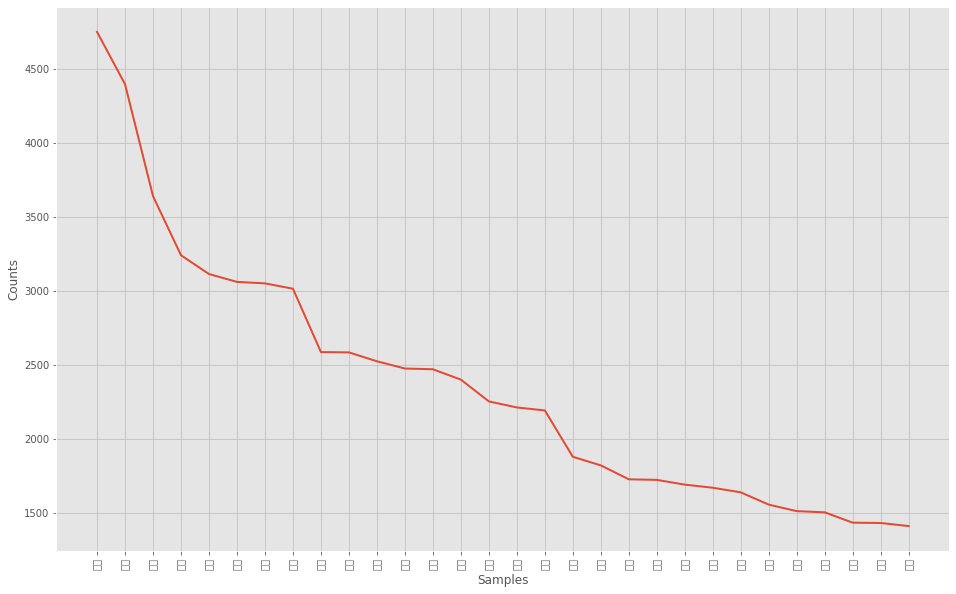

In [ ]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin': # 맥이면 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우면 
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
Text_Fre.plot(30)

### WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
a = dict(Text_Fre.vocab().most_common(50))

In [ ]:
a

{'동생': 3640,
 '이혼': 3240,
 '그냥': 3113,
 '지금': 3060,
 '생각': 3050,
 '친구': 3014,
 '사람': 2586,
 '오빠': 2585,
 '힘들': 2524,
 '공부': 2475,
 '모르': 2470,
 '그렇': 2400,
 '못하': 2232,
 '언니': 2212,
 '싸우': 2192,
 '때리': 1879,
 '소리': 1821,
 '부모': 1727,
 '폭력': 1723,
 '그런': 1691,
 '계속': 1670,
 '나가': 1639,
 '이제': 1556,
 '가정': 1512,
 '학교': 1504,
 '가족': 1434,
 '얘기': 1432,
 '정도': 1411,
 '맨날': 1395,
 '잘못': 1351,
 '심하': 1243,
 '들어오': 1241,
 '어리': 1195,
 '학년': 1116,
 '항상': 1096,
 '전화': 1083,
 '마음': 1078,
 '욕하': 1070,
 '여자': 1030,
 '차별': 1024,
 '엄청': 998,
 '학원': 972,
 '남자': 958,
 '스트레스': 948,
 '할머니': 926,
 '요즘': 919,
 '솔직히': 900,
 '안되': 887,
 '미치': 882,
 '문제': 863}

In [ ]:
key1 = []
value1 = []

for key, value in a.items():
    key1.append(key)
    value1.append(value)

In [ ]:
wordcloud = WordCloud()
wordcloud = wordcloud.generate_from_text(key)
wordcloud = wordcloud.generate_from_frequencies(a)

In [ ]:
from wordcloud import STOPWORDS
stopwords = {'ㅠㅠ','ㅜㅜ'}

wordcloud = WordCloud(stopwords = stopwords)
wordcloud = wordcloud.generate_from_text(key)

In [ ]:
from PIL import Image

In [ ]:
mask1 = np.array(Image.open('C:\\Users\\minay\\Downloads\\2.png'))

In [ ]:
b = []
for i in SW:
    b.append(i.replace('\n',''))

In [ ]:
b = set(b)
b.add('엄마')
b.add('아빠')
b.add('정말')
b.add('진짜')
b.add('ㅠㅠ')
b.add('ㅜㅜ')
SW = b

In [ ]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [ ]:
wordcloud = WordCloud(
    stopwords = SW,
    width = 500,
    height = 500,
    font_path = 'C:\Windows\Fonts\malgunsl.ttf',
    mask = mask1,
    background_color='white',
)
wordcloud = wordcloud.generate_from_frequencies(a)

In [ ]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) #(800, 800, 3)

<class 'numpy.ndarray'>
(886, 885, 3)


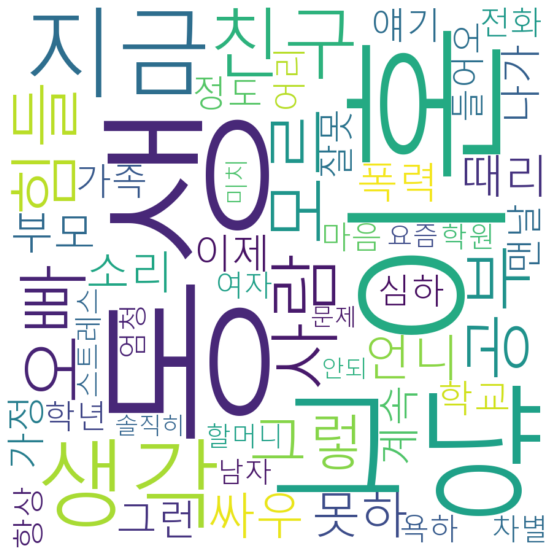

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

### ====================================

In [ ]:
Text_Fre = nltk.Text(total_tokens, name = 'Child')
pprint(Text_Fre.vocab().most_common(100))

[('동생', 3640),
 ('이혼', 3240),
 ('그냥', 3113),
 ('지금', 3060),
 ('생각', 3050),
 ('친구', 3014),
 ('사람', 2586),
 ('오빠', 2585),
 ('힘들', 2524),
 ('공부', 2475),
 ('모르', 2470),
 ('그렇', 2400),
 ('못하', 2232),
 ('언니', 2212),
 ('싸우', 2192),
 ('때리', 1879),
 ('소리', 1821),
 ('부모', 1727),
 ('폭력', 1723),
 ('그런', 1691),
 ('계속', 1670),
 ('나가', 1639),
 ('이제', 1556),
 ('가정', 1512),
 ('학교', 1504),
 ('가족', 1434),
 ('얘기', 1432),
 ('정도', 1411),
 ('맨날', 1395),
 ('잘못', 1351),
 ('심하', 1243),
 ('들어오', 1241),
 ('어리', 1195),
 ('학년', 1116),
 ('항상', 1096),
 ('전화', 1083),
 ('마음', 1078),
 ('욕하', 1070),
 ('여자', 1030),
 ('차별', 1024),
 ('엄청', 998),
 ('학원', 972),
 ('남자', 958),
 ('스트레스', 948),
 ('할머니', 926),
 ('요즘', 919),
 ('솔직히', 900),
 ('안되', 887),
 ('미치', 882),
 ('문제', 863),
 ('안녕', 847),
 ('이유', 844),
 ('지르', 840),
 ('다시', 828),
 ('들어가', 802),
 ('무섭', 794),
 ('생각하', 787),
 ('머리', 770),
 ('아버지', 762),
 ('신고', 761),
 ('말하', 744),
 ('아무', 743),
 ('대하', 739),
 ('만나', 737),
 ('매일', 735),
 ('아직', 719),
 ('없이', 688),
 ('성격', 676),


In [ ]:
stooppppp!

SyntaxError: invalid syntax (<ipython-input-38-ebe94496ee45>, line 1)

In [ ]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin': # 맥이면 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우면 
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
Text_Fre.plot(30)
#시각화를 해주는 코드 

In [ ]:
train_data[3][1]

In [ ]:
data_text = []
data_senti = []
for i in range(len(train_data)):
    data_text.append(train_data[i][0])
    data_senti.append(train_data[i][1])

In [ ]:
print(len(data_text))
print(len(data_senti))

In [ ]:
train_text, test_text, train_senti, test_senti = train_test_split(data_text, data_senti, stratify = data_senti)

In [ ]:
print(len(train_text))
print(len(train_senti))

###  LSTM

In [ ]:
max_words = 5000
max_len = 100
Batch_size = 32
Epochs = 20

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Activation, SimpleRNN

In [ ]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_text)

In [ ]:
X_train = tokenizer.texts_to_sequences(train_text)
X_test = tokenizer.texts_to_sequences(test_text)
y_train = train_senti
y_test = test_senti

In [ ]:
X_train = pad_sequences(X_train, value = 0, padding = 'pre', maxlen = max_len)
#X의 길이를 50에 맞춰주고 50개의 고유한 인덱스가 없으면 0으로 채워주는 것 
X_test = pad_sequences(X_test, value = 0, padding = 'pre', maxlen = max_len)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(500).batch(Batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(Batch_size)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train.shape

In [ ]:
embedding_dim = 50
model = models.Sequential()
model.add(layers.Embedding(max_words, output_dim = embedding_dim,input_length = max_len))
#input node가 만개, output이 50개 각 노드의 길이는 200
model.add(layers.LSTM(50))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
history = model.fit(X_train, y_train,  epochs = Epochs, batch_size = Batch_size, validation_data = (X_test,y_test))

In [ ]:
score, acc =model.evaluate(X_test, y_test, batch_size = Batch_size)

In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
tokenizer 저장 

In [ ]:
def sentiment_predict(new_sentence):
    if new_sentence != '':
        new_sentence1 = text_cleaning(new_sentence)
        new_sentence2 = rhinoMorph.onlyMorph_list(rn,new_sentence1, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False)
        new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
        encoded = tokenizer.texts_to_sequences([new_sentence3]) # 정수 인코딩
        if encoded != [[]]:
            pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
            score = float(model.predict(pad_new)) # 예측
            if(score > 0.5):
                print("아동학대 가능성이 {:.2f}% 확률입니다.\n".format(score * 100))
            else:
                print("아동학대 가능성이 {:.2f}% 확률입니다.\n".format(score * 100))
        else:
            print('아동학대 가능성이 0% 확률입니다.\n')

In [ ]:
rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False)

In [ ]:
new_sentence = input()

In [ ]:
new_sentence1 = text_cleaning(new_sentence)
new_sentence2 = rhinoMorph.onlyMorph_list(rn,new_sentence1, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False)
new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
encoded = tokenizer.texts_to_sequences([new_sentence3]) # 정수 인코딩

In [ ]:
new_sentence1 = text_cleaning(new_sentence)
new_sentence2 = text_tokenizing(new_sentence1)
new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
encoded = tokenizer.texts_to_sequences([new_sentence3])

In [ ]:
print(new_sentence1)
print(new_sentence2)
print(new_sentence3)
print(encoded)

In [ ]:
doc = input()

In [ ]:
text_tokenizing(doc)

In [ ]:
sentiment_predict(doc)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)


In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")


### 저장된 모델 불러오기 

In [ ]:
from tensorflow.compat.v2.keras.models import model_from_json


In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [ ]:
loaded_model = model_from_json(loaded_model_json)


In [ ]:
loaded_model.load_weights('model.h5')
print('Loaded model from disk')

In [ ]:
loaded_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print('Accuracy : %.2f%%' %(test_acc*100))

In [ ]:
from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
